# Instituto Tecnológico de Costa Rica

# Proyecto de Aprendizaje Automatizado

## Autor: Erick Edgardo Salas Chaverri 111550650

## Profesor: Felipe Meza

# Título: CNN (Convolutional Neural Networks) aplicado a diversos datasets de imágenes. Fashion MNIST

El presente proyecto consiste en un recorrido

Let's now take this to the next level by solving a real problem, computer vision. Computer vision is the field of having a computer understand and label what is present in an image. Consider this slide. When you look at it, you can interpret what a shirt is or what a shoe is, but how would you program for that? If an extra terrestrial who had never seen clothing walked into the room with you, how would you explain the shoes to him? It's really difficult, if not impossible to do right? And it's the same problem with computer vision. So one way to solve that is to use lots of pictures of clothing and tell the computer what that's a picture of and then have the computer figure out the patterns that give you the difference between a shoe, and a shirt, and a handbag, and a coat. That's what you're going to learn how to do in this section. Fortunately, there's a data set called Fashion MNIST which gives a 70 thousand images spread across 10 different items of clothing. These images have been scaled down to 28 by 28 pixels. Now usually, the smaller the better because the computer has less processing to do. But of course, you need to retain enough information to be sure that the features and the object can still be distinguished. If you look at this slide you can still tell the difference between shirts, shoes, and handbags. So this size does seem to be ideal, and it makes it great for training a neural network. The images are also in gray scale, so the amount of information is also reduced. Each pixel can be represented in values from zero to 255 and so it's only one byte per pixel. With 28 by 28 pixels in an image, only 784 bytes are needed to store the entire image. Despite that, we can still see what's in the image and in this case, it's an ankle boot, right?

Fashion MNIST
70 k images
10 Categories
images are 28 x28
Can train a neural net

Machine Learning depends on having good data to train a system with. In this video you saw a scenario for training a system to recognize fashion images. The data comes from a dataset called Fashion MNIST, and you can learn more about it and explore it in GitHub here. In the next video, you’ll see how to load that data and prepare it for training.

In this lesson, you're going to use them to go a little deeper but the overall API should look familiar. The one big difference will be in the data. The last time you had your six pairs of numbers, so you could hard code it. This time you have to load 70,000 images off the disk, so there'll be a bit of code to handle that. Fortunately, it's still quite simple because Fashion-MNIST is available as a data set with an API call in TensorFlow. We simply declare an object of type MNIST loading it from the Keras database. On this object, if we call the load data method, it will return four lists to us. That's the training data, the training labels, the testing data, and the testing labels. Now, what are these you might ask? Well, when building a neural network like this, it's a nice strategy to use some of your data to train the neural network and similar data that the model hasn't yet seen to test how good it is at recognizing the images. So in the Fashion-MNIST data set, 60,000 of the 70,000 images are used to train the network, and then 10,000 images, one that it hasn't previously seen, can be used to test just how good or how bad it is performing. So this code will give you those sets. Then, each set has data, the images themselves and labels and that's what the image is actually of. So for example, the training data will contain images like this one, and a label that describes the image like this. While this image is an ankle boot, the label describing it is the number nine. Now, why do you think that might be? There's two main reasons. First, of course, is that computers do better with numbers than they do with texts. Second, importantly, is that this is something that can help us reduce bias. If we labeled it as an ankle boot, we would be of course biasing towards English speakers. But with it being a numeric label, we can then refer to it in our appropriate language be it English, Chinese, Japanese, or here, even Irish Gaelic.

Here you saw how the data can be loaded into Python data structures that make it easy to train a neural network. You saw how the image is represented as a 28x28 array of greyscales, and how its label is a number. Using a number is a first step in avoiding bias -- instead of labelling it with words in a specific language and excluding people who don’t speak that language! You can learn more about bias and techniques to avoid it here.

Primero se importa la biblioteca keras

In [6]:
import keras

Using TensorFlow backend.


Construyendo una variable fashion_mnist para hacer referencia a la colección de imágenes.

In [7]:
fashion_mnist = keras.datasets.fashion_mnist

Dicha colección del tipo MNIST se puede descargar desde la base de datos de KERAS


|Categoría| Imagenes | Etiquetas |
|--|--|--|
| entrenamiento | train_images | train_labels |
| pruebas | test_images |test_labels |

In [8]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


Se crearon los conjuntos de datos. Se muestran sus dimensiones

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
train_labels.shape

(60000,)

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
test_labels.shape

(10000,)

Se sabe que el total de imágenes es de 70000. Cada imágen es de 28 por 28 pixeles

In [15]:
import matplotlib.pyplot as plt

Tomando sólo la primera imagen sólo revisar su forma. En escala de grises o con la coloración original

In [17]:
test_images[0].shape

(28, 28)

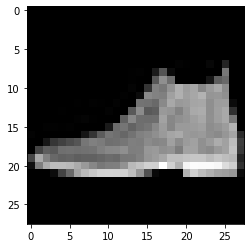

In [34]:
plt.imshow(test_images[0], cmap='gray')

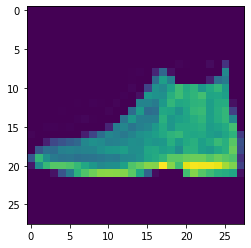

In [35]:
plt.imshow(test_images[0])

In [36]:
test_labels[0]

9

## Normalización

Como los valores tiene un rango de 0 a 255. Se recomienda hacer una normalización del tipo que los limites van del 0 a 255.

In [47]:
train_images = train_images / 255.0

In [48]:
test_images = test_images / 255.0

## Codificación etiqueta vs tipo de prenda

| Etiqueta: label | Descripción: Nombre prenda |
|--|--|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [114]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [120]:
logdir = "logs/plots/" + datetime.now().strftime("%Y%m%d-%H%M%S")
file_writer = tf.summary.FileWriter(logdir)

# Primera aproximación

## Red Neuronal. 
Con una capa oculta de 128 neuronas. Forma de entrada de 28 x 28. Forma de entrada esperada.

3 capas.

Capa de salida de 10 neuronas. Tiene que coincidir con las 10 clases de prendas de vestir en el conjunto de datos.

In [40]:
import tensorflow as tf

In [75]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
]
)

Sequential define la estructura o arquitectura de la red neuronal.

Flatten para 'aplanar' la naturaleza de 2 dimensiones de la imagen y convertirla a arreglos de 1 dimensión.

Dense: Agrega una red de neuronal.

Relu: Para aplicar la función de activación.

Softmax: toma un conjunto de valores de la salida de la última capa, completa la codificación dando el máximo a la sálida según corresponda.


La complicación del modelo contempla el optimizador y la función de perdida.

In [76]:
model.compile(optimizer = tf.train.AdamOptimizer(), 
              loss = 'sparse_categorical_crossentropy')

Para entrenar la red es requerido utilizar las imágenes de entrenamiento y sus correspondientes etiquetas. Para este caso 5 epochs.

In [77]:
from time import time

In [85]:
from datetime import datetime

In [88]:
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [100]:
training_history = model.fit(train_images, train_labels, epochs=5,verbose=0, callbacks=[tensorboard_callback])

In [101]:
import numpy as np

In [102]:
print("Average test loss: ", np.average(training_history.history['loss']))

Average test loss:  0.21742890042920907


In [103]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 39us/step


0.3487987966001034

In [104]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [105]:
%tensorboard --logdir logs/scalars

Reusing TensorBoard on port 6006 (pid 26076), started 0:03:30 ago. (Use '!kill 26076' to kill it.)

In [106]:
def plot_confusion_matrix(cm, class_names):
  """
  Returns a matplotlib figure containing the plotted confusion matrix.

  Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
  """
  figure = plt.figure(figsize=(8, 8))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names)

  # Normalize the confusion matrix.
  cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

  # Use white text if squares are dark; otherwise black.
  threshold = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > threshold else "black"
    plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  return figure

In [109]:
logdir = "logs/image/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# Define the basic TensorBoard callback.
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)


In [110]:
def log_confusion_matrix(epoch, logs):
  # Use the model to predict the values from the validation dataset.
  test_pred_raw = model.predict(test_images)
  test_pred = np.argmax(test_pred_raw, axis=1)

  # Calculate the confusion matrix.
  cm = sklearn.metrics.confusion_matrix(test_labels, test_pred)
  # Log the confusion matrix as an image summary.
  figure = plot_confusion_matrix(cm, class_names=class_names)
  cm_image = plot_to_image(figure)

  # Log the confusion matrix as an image summary.
  with file_writer_cm.as_default():
    tf.summary.image("Confusion Matrix", cm_image, step=epoch)

# Define the per-epoch callback.
cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [112]:
import sklearn

In [116]:
import itertools

Reusing TensorBoard on port 6006 (pid 25336), started 0:13:58 ago. (Use '!kill 25336' to kill it.)

NameError: name 'io' is not defined

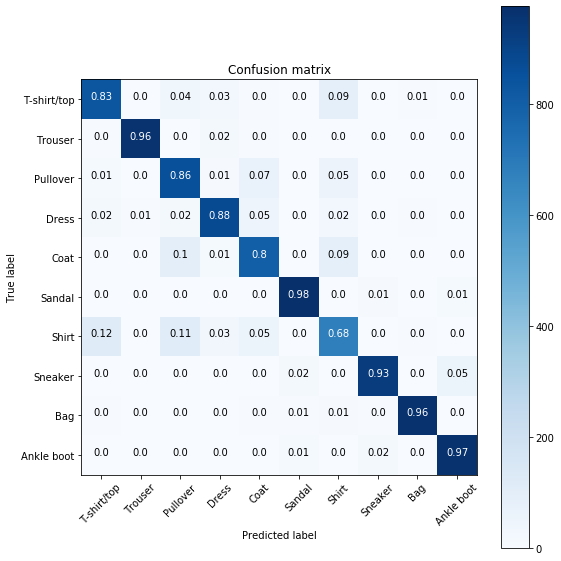

In [123]:
# Start TensorBoard.
%tensorboard --logdir logs/image

# Train the classifier.
model.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=0, # Suppress chatty output
    callbacks=[tensorboard_callback, cm_callback],
    validation_data=(test_images, test_labels),
)

# Agregando un callback para parar el entrenamiento

Parar el entrenamiento en caso de que el loss es bajo.

In [132]:
class  myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.4):
            print('\nLa pérdida "Loss" es bajo... cancelando training')
            self.model.stop_training = True

In [133]:
callbacks = myCallback()

In [136]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
]
)

In [137]:
model.compile(optimizer = tf.train.AdamOptimizer(), 
              loss = 'sparse_categorical_crossentropy')

In [141]:
my_history = model.fit(train_images, train_labels, epochs=5,verbose=1, callbacks=[callbacks])

Epoch 1/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.3115

La pérdida "Loss" es bajo... cancelando training


Se comprueba la prueba de concepto del callback para parar el entrenamiento según el valor de la pérdida.

In [143]:
my_history.history

{'loss': [0.3115351651171843]}

# Ejecutando con múltiples epochs

In [167]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
]
)

In [168]:
model.compile(optimizer = tf.train.AdamOptimizer(), 
              loss = 'sparse_categorical_crossentropy')

In [169]:
my_history = model.fit(train_images, train_labels, epochs=10,verbose=1)

Epoch 1/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.5022
Epoch 2/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.3803
Epoch 3/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.3385
Epoch 4/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.3144
Epoch 5/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.2974
Epoch 6/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.2828
Epoch 7/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.2687
Epoch 8/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.2580
Epoch 9/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.2481
Epoch 10/10
60000/60000 [==============================] - 16s 273us/step - loss: 0.2400


In [170]:
my_history.history

{'loss': [0.5021811904986699,
  0.38026689185698825,
  0.3384985315342744,
  0.31444160530368487,
  0.29744283271829286,
  0.28284677976965905,
  0.26870740312238534,
  0.2579884149059653,
  0.24809178719321887,
  0.24003102862536907]}

### Agregnado la métrica , metrics=['accuracy']

In [171]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
]
)

In [172]:
model.compile(optimizer = tf.train.AdamOptimizer(), 
              loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [173]:
my_history = model.fit(train_images, train_labels, epochs=10,verbose=1)

Epoch 1/10
60000/60000 [==============================] - 24s 398us/step - loss: 0.4967 - acc: 0.82700s - loss: 0.50
Epoch 2/10
60000/60000 [==============================] - 24s 404us/step - loss: 0.3748 - acc: 0.8645
Epoch 3/10
60000/60000 [==============================] - 23s 389us/step - loss: 0.3357 - acc: 0.8780
Epoch 4/10
60000/60000 [==============================] - 20s 333us/step - loss: 0.3148 - acc: 0.8846
Epoch 5/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.2966 - acc: 0.8910
Epoch 6/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.2827 - acc: 0.8957
Epoch 7/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.2691 - acc: 0.9007
Epoch 8/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.2586 - acc: 0.9039
Epoch 9/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.2493 - acc: 0.9079
Epoch 10/10
60000/60000 [==============================] - 6s 96us/step - 

In [174]:
my_history.history

{'loss': [0.4967258287747701,
  0.3748453249136607,
  0.33573111370205877,
  0.3148148746152719,
  0.29662190756201745,
  0.2827422562857469,
  0.2691472189883391,
  0.25857198337515197,
  0.24933113705317178,
  0.23935178855260214],
 'acc': [0.8269666666666666,
  0.8645166666666667,
  0.8780166666666667,
  0.8846333333333334,
  0.8910166666666667,
  0.8956666666666667,
  0.9007166666666667,
  0.9038666666666667,
  0.90785,
  0.9114833333333333]}

In [175]:
import pandas as pd

In [178]:
df_history = pd.DataFrame(my_history.history)
df_history.head(10)

,loss,acc
0,0.496726,0.826967
1,0.374845,0.864517
2,0.335731,0.878017
3,0.314815,0.884633
4,0.296622,0.891017
5,0.282742,0.895667
6,0.269147,0.900717
7,0.258572,0.903867
8,0.249331,0.907850
9,0.239352,0.911483


In [180]:
### Graficando las curvas de loss y accuracy para epoch de 10

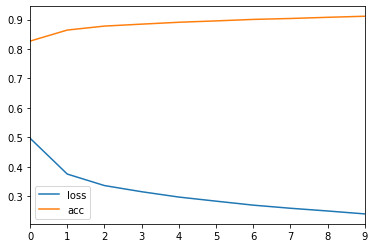

In [179]:
df_history.plot()